In [ ]:
import os
import utils_general_porpose
import pandas as pd
import re
from nltk.util import ngrams
from collections import Counter
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [14]:
current_dir = os.getcwd()
print("Current directory:", current_dir)
data = utils_general_porpose.load_json(current_dir, "/concepts/clinical_concepts_20250402_205502.json")

Current directory: /home/pajaro/compu_Pipe_V3


In [15]:
df = pd.DataFrame(data)
df.head()

,id_cliente,label,entities,codes
0,1619,1.0,demencia no especificada antecedentes cardi...,C0497327 C0332119 C0152105 C1145670 C0001511 C...
1,5256,1.0,hipertension esencial (primaria) infarto antig...,C0085580 C0155668 C0478671 C0041674 C0013658 C...
2,7039,1.0,artritis no especificada antecedente artriti...,C0003864 C0332119 C0003873 C0231441 C0029410 C...
3,9669,1.0,otro dolor cronico dolor dolor dolor anteceden...,C0478148 C0030193 C0030193 C0030193 C0332119 C...
4,10915,1.0,malformacion congenitas de las camaras cardiac...,C0478009 C0010200 C0220704 C0014175 C0006285 C...


In [16]:
def cleanReviews(documents):
    cleanedReviews = []
    for document in documents:
        s = re.sub(r'[^a-zA-Z0-9\s]', '', document)
        s = re.sub('\s+',' ', s)
        s = str(s).lower()
        tokens = [token for token in s.split(" ") if token != ""]
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        tokens = [word for word in tokens if word not in ['alexa', 'echo', 'dot']]
        review = ' '.join(tokens)
        cleanedReviews.append(review)
    return(cleanedReviews)

In [17]:
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

In [18]:
def plotNgrams(documents):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5)
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5)
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()

In [19]:
def textTrends(documents):
    cleanedReviews = cleanReviews(documents)
    plotNgrams(cleanedReviews)

In [20]:
negApnea = df[df["label"] == 0]
print(negApnea.shape)
posApnea = df[df["label"] == 1]
print(posApnea.shape)

(192, 4)
(732, 4)


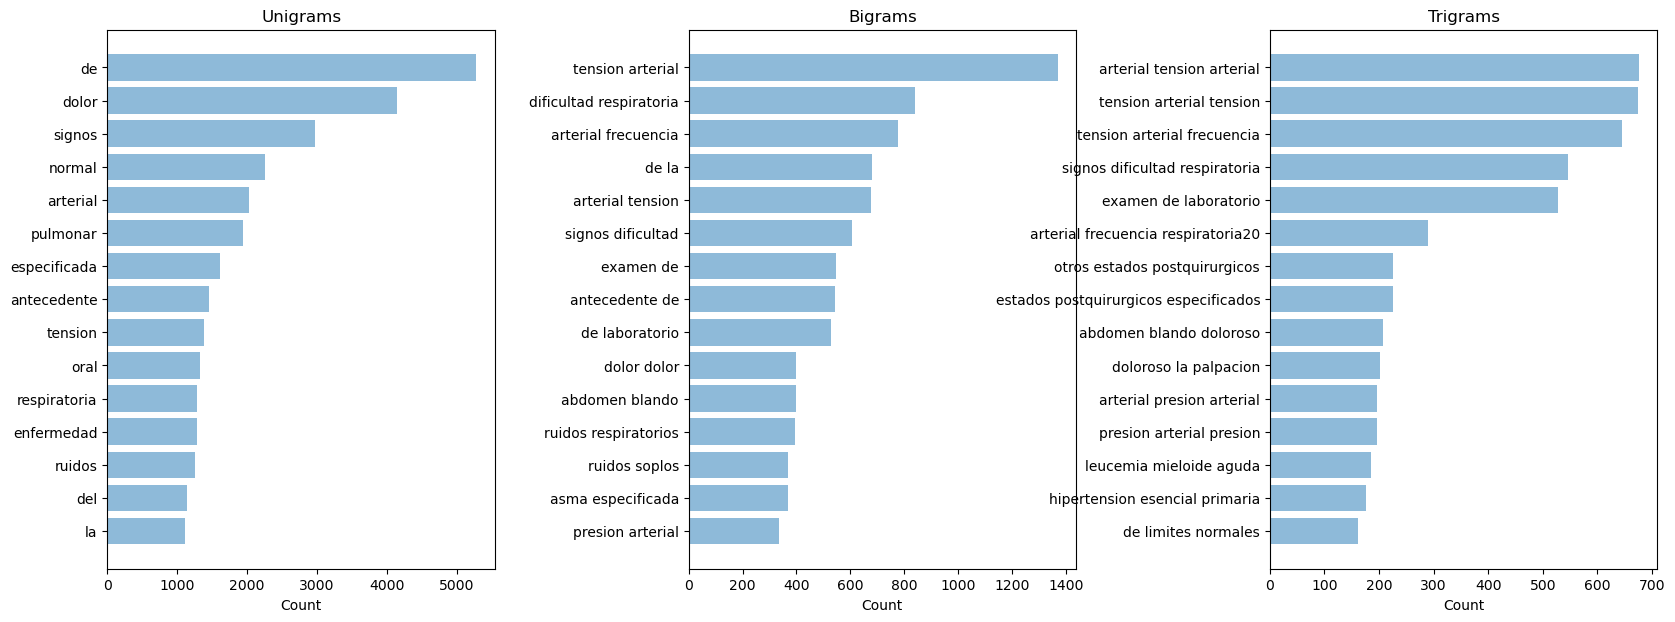

In [ ]:
textTrends(negApnea["entities"])

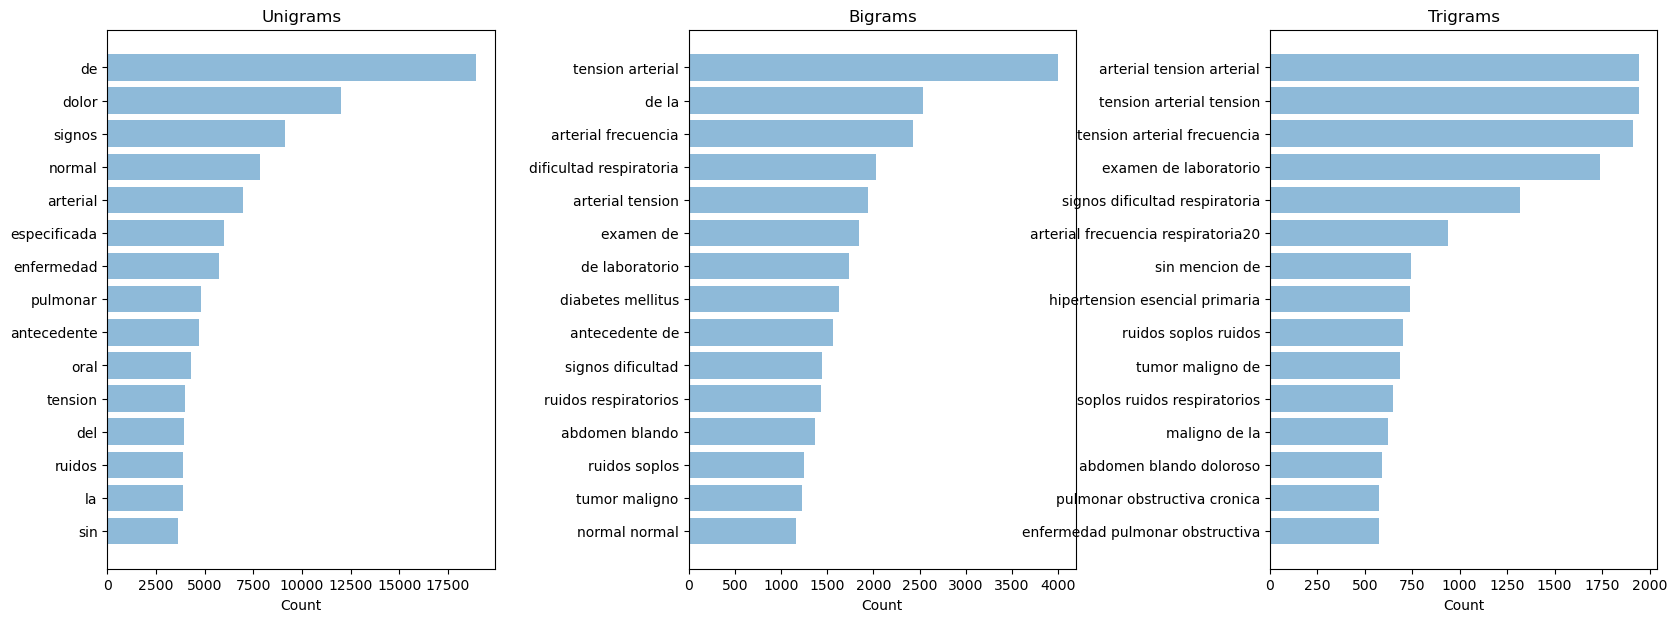

In [23]:
textTrends(posApnea["entities"])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  924 non-null    int64  
 1   label       924 non-null    float64
 2   entities    924 non-null    object 
 3   codes       924 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 29.0+ KB
